# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
from pathlib import Path
from datetime import datetime
import seaborn.objects as so


In [2]:
cuestionario = pd.read_excel("EGD-Cuestionario.xlsx", engine='openpyxl')
cuestionario.columns = cuestionario.iloc[0]
cuestionario = cuestionario.iloc[1:]

# Plots

## Pregunta P2.GC.1

In [3]:
CantPersonas = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.GC.1"]]
bin = [0,50,100,150,200,300,500,800,1000,3000,10000,50000,57000]
numerico = pd.to_numeric(CantPersonas['P2.GC.1'], errors='coerce').notna()
CantPersonas = CantPersonas.loc[numerico]
CantPersonas['P2.GC.1'].dropna(inplace=True)
CantPersonas["P2.GC.1"] = CantPersonas["P2.GC.1"].astype(int)
bins = pd.cut(CantPersonas['P2.GC.1'], bins=bin, include_lowest=True)
CantPersonas['intervalos'] = bins

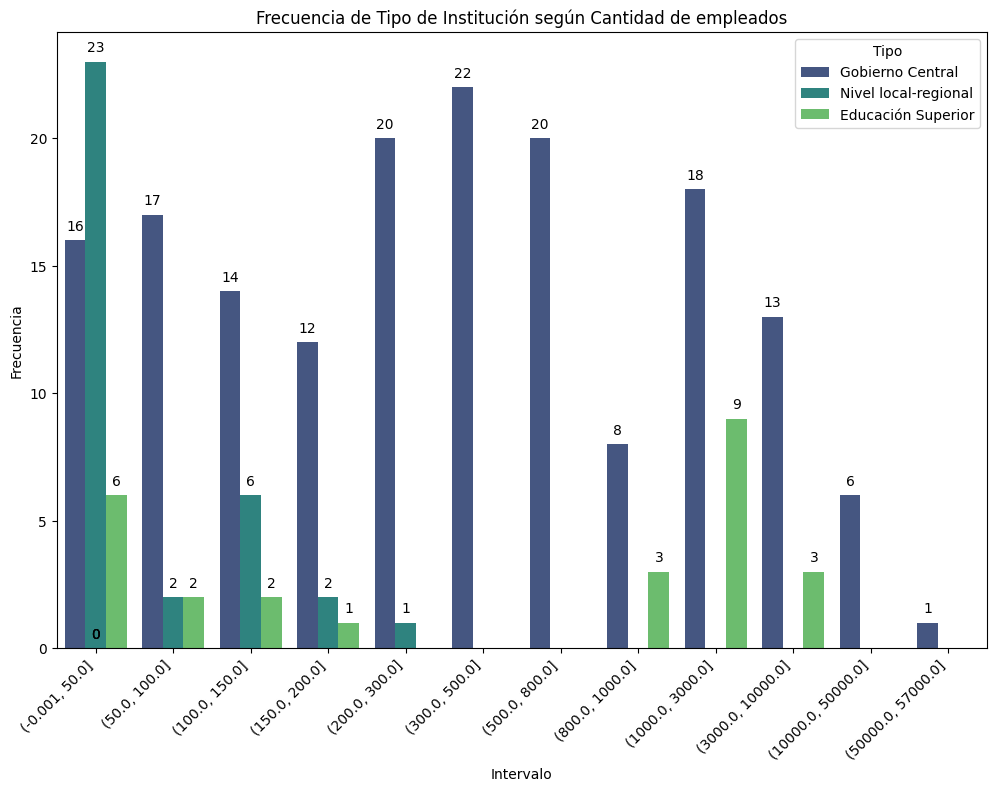

In [4]:
CantPersonas['intervalos'] = pd.Categorical(CantPersonas['intervalos'], ordered=True, categories=CantPersonas['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de Institución según Cantidad de empleados')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_15684\471746787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')


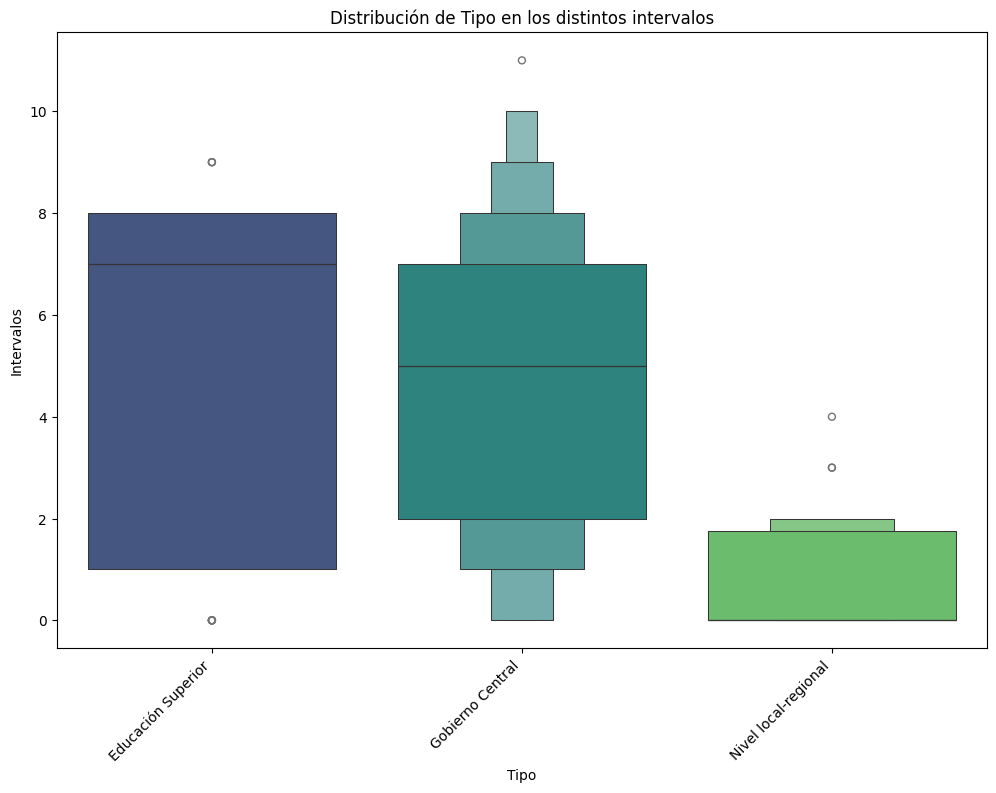

In [5]:
CantPersonas['intervalos'] = CantPersonas['intervalos'].cat.codes
CantPersonas['Tipo'] = CantPersonas['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


## Pregunta P2.M.1

In [6]:
CantPersonasAdm = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.1"]]

CantPersonasCorp = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.2"]]

In [7]:
#Administracion municipal
binAdm = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 5000]
numerico = pd.to_numeric(CantPersonasAdm['P2.M.1.1'], errors='coerce').notna()
CantPersonasAdm = CantPersonasAdm.loc[numerico]
CantPersonasAdm['P2.M.1.1'].dropna(inplace=True)
CantPersonasAdm["P2.M.1.1"] = CantPersonasAdm["P2.M.1.1"].astype(int)
bins = pd.cut(CantPersonasAdm["P2.M.1.1"], bins=binAdm, include_lowest=True)
CantPersonasAdm['intervalos'] = bins

#Corp o fund municipales

binCorp = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 6000]
numerico = pd.to_numeric(CantPersonasCorp['P2.M.1.2'], errors='coerce').notna()
CantPersonasCorp = CantPersonasCorp.loc[numerico]
CantPersonasCorp['P2.M.1.2'].dropna(inplace=True)
CantPersonasCorp["P2.M.1.2"] = CantPersonasCorp["P2.M.1.2"].astype(int)
bins = pd.cut(CantPersonasCorp["P2.M.1.2"], bins=binCorp, include_lowest=True)
CantPersonasCorp['intervalos'] = bins

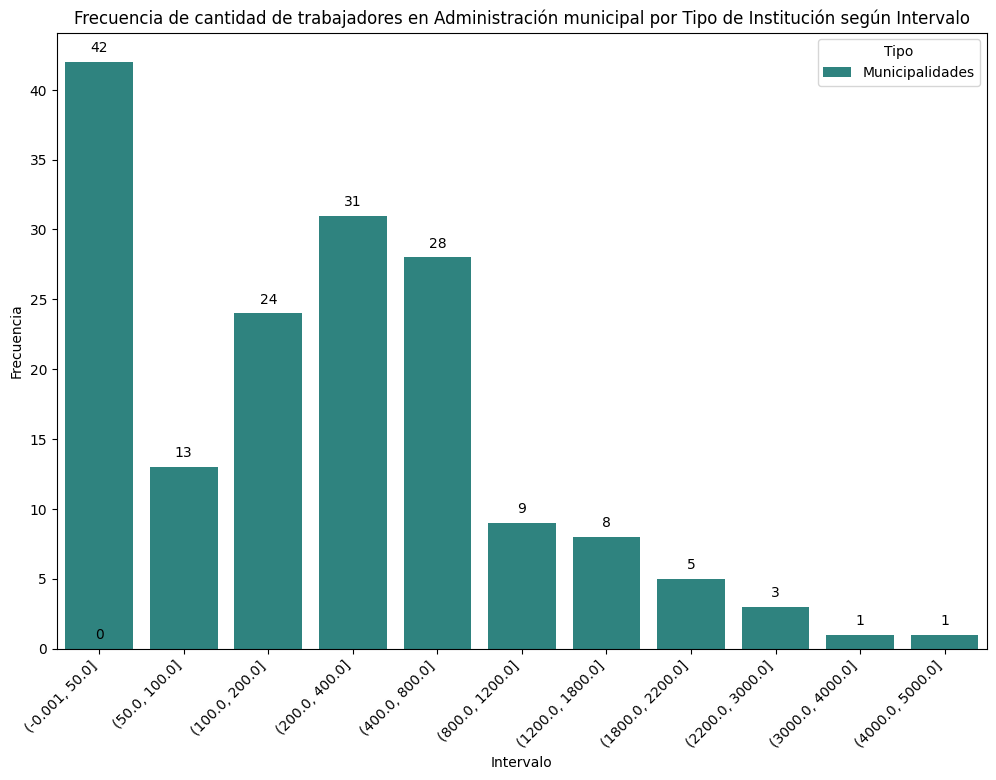

In [8]:
CantPersonasAdm['intervalos'] = pd.Categorical(CantPersonasAdm['intervalos'], ordered=True, categories=CantPersonasAdm['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasAdm, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Administración municipal por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

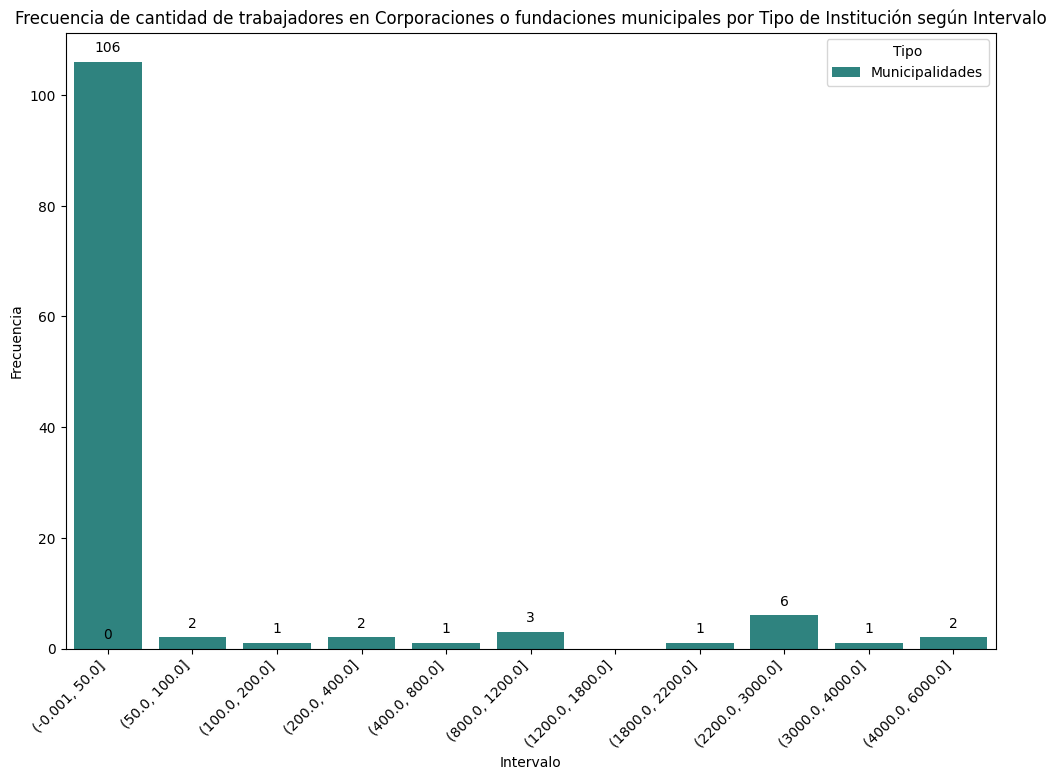

In [9]:
CantPersonasCorp['intervalos'] = pd.Categorical(CantPersonasCorp['intervalos'], ordered=True, categories=CantPersonasCorp['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasCorp, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Corporaciones o fundaciones municipales por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

## Pregunta P2.5

In [10]:
funciones = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]]

In [11]:
funciones = funciones.replace("#s.i.",0)
funciones = funciones.replace("#n.s.",0)
funciones = funciones.replace("#n.a.",0)

In [12]:
def convertir_a_1(valor):
    return 1 if valor != 0 else 0

In [13]:
columnas_p2_5 = funciones.columns[funciones.columns.str.startswith("P2.5")]
funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)

C:\Users\alejo\AppData\Local\Temp\ipykernel_15684\3883449651.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)


In [14]:
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]

df_melted = pd.melt(df_frecuencia, id_vars=['Tipo'], var_name='Columna', value_name='Frecuencia')

df_melted = df_melted[df_melted['Frecuencia'] == 1]

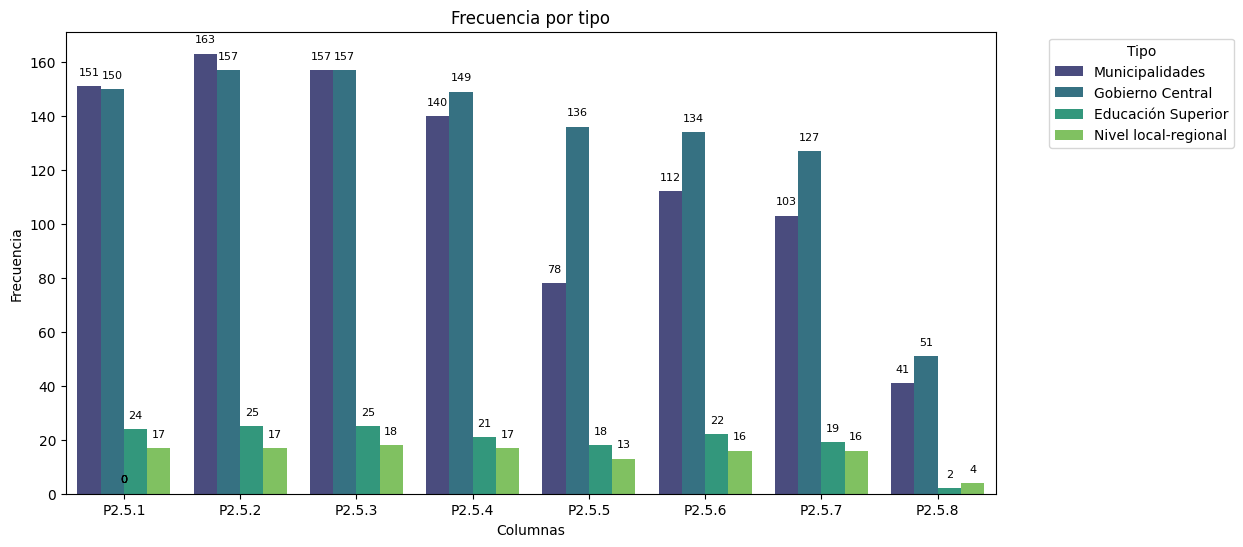

In [15]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Columna', hue='Tipo', data=df_melted, palette='viridis')

plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por tipo')

for p in ax.patches:
    ax.annotate((f'{round(p.get_height())}'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)


plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Pregunta P2.6b

In [16]:
PersInfor = cuestionario[["Tipo","P1.1.1","P2.6b.1","P2.6b.2"]]
PersInfor = PersInfor.replace({'#s.i.': 0, '#n.a.': 0})

PersInfor['P2.6b.1'] = pd.to_numeric(PersInfor['P2.6b.1'], errors="coerce")
PersInfor['P2.6b.2'] = pd.to_numeric(PersInfor['P2.6b.2'], errors="coerce")
PersInfor['P2.6b.1'] = PersInfor['P2.6b.1'].astype(float)
PersInfor['P2.6b.2'] = PersInfor['P2.6b.2'].astype(float)
pivot_table = PersInfor.pivot_table(index='Tipo', values=['P2.6b.1', 'P2.6b.2'], aggfunc='sum')

df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
df_percentage = df_percentage.dropna()

df_percentage['P2.6b.1'] = pd.to_numeric(df_percentage['P2.6b.1'])
df_percentage['P2.6b.2'] = pd.to_numeric(df_percentage['P2.6b.2'])

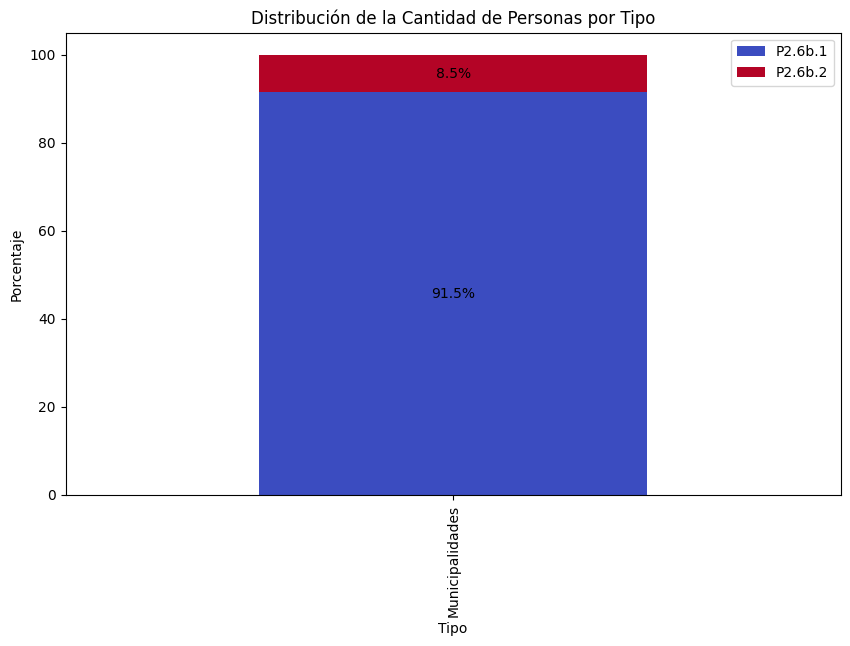

In [17]:
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(['P2.6b.1', 'P2.6b.2'], loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

## Pregunta P2.7

In [18]:
PropEquipos = cuestionario[["Tipo","P2.GC.1","P2.M.1.1","P2.M.1.2","P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"]]
PropEquipos = PropEquipos.replace({'#s.i.': 0, '#n.a.': 0})

In [19]:
PropEquipos["PersonalInstitución"] = PropEquipos["P2.GC.1"] + PropEquipos["P2.M.1.1"] + PropEquipos["P2.M.1.2"]
PropEquipos["PersonalTIC"] = PropEquipos["P2.7.1"] + PropEquipos["P2.7.2"] + PropEquipos["P2.7.3"] + PropEquipos["P2.7.4"] + PropEquipos["P2.7.5"] + PropEquipos["P2.7.6"]
PropEquipos["ProporcionTIC"] = PropEquipos["PersonalTIC"] * 100 / PropEquipos["PersonalInstitución"]

In [20]:
PropTIC = PropEquipos[["Tipo","ProporcionTIC"]]
PropTIC = PropTIC.replace({np.inf: np.nan})
PropTIC = PropTIC.dropna()
bin = [0,10,20,30,40,50,60,70,80,90,100]
bins = pd.cut(PropTIC['ProporcionTIC'], bins=bin, include_lowest=True)
PropTIC['intervalos'] = bins

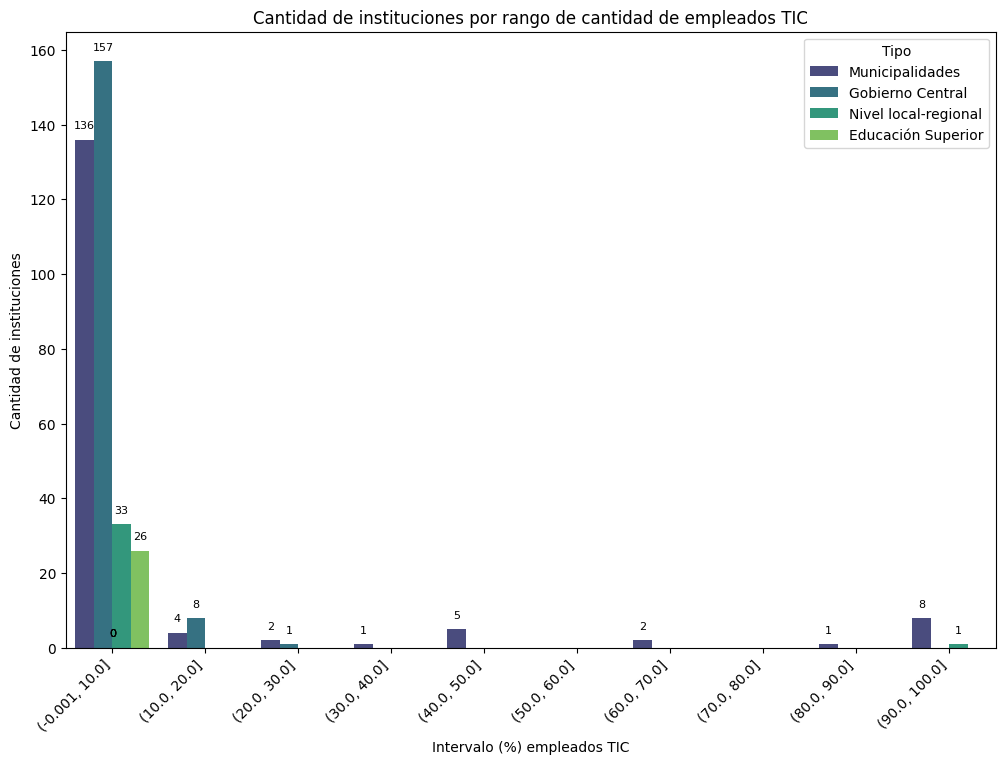

In [21]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PropTIC, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo (%) empleados TIC')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de cantidad de empleados TIC')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [22]:
pivot_table = PropEquipos.pivot_table(index='Tipo', values=["P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"], aggfunc='sum')

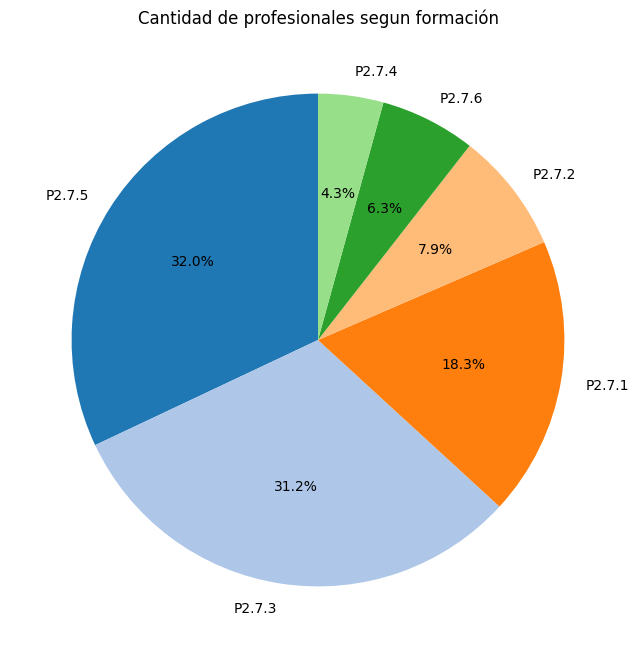

In [23]:
df_sum = pivot_table.sum()
df_sum = df_sum.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Cantidad de profesionales segun formación')
plt.show()

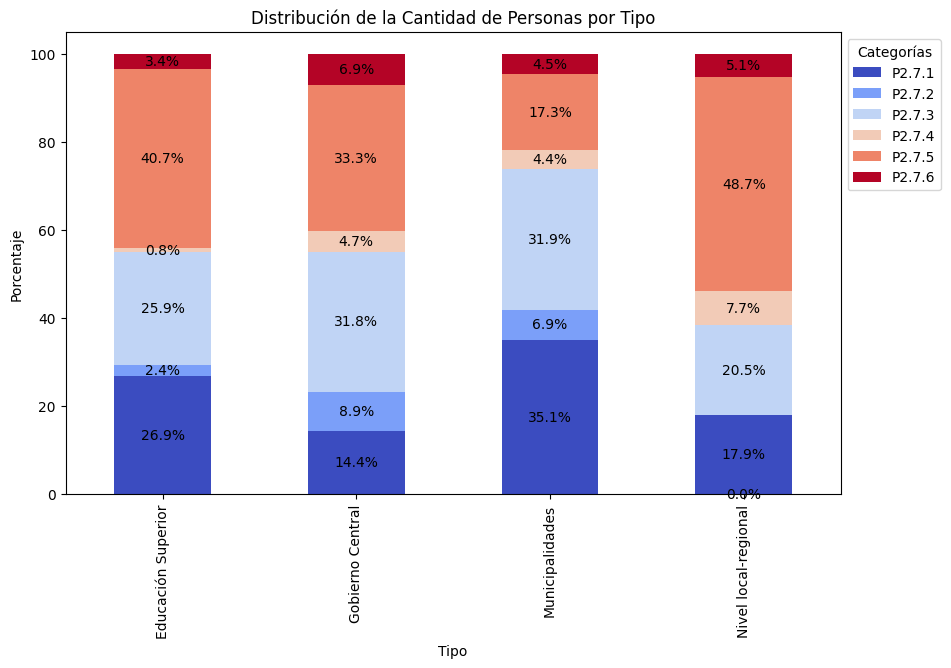

In [24]:
df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(title='Categorías', bbox_to_anchor=(1, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

## Pregunta 2.8

In [25]:
ProfPorPerfil = cuestionario[["Tipo","P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]]
ProfPorPerfil = ProfPorPerfil.replace({'#s.i.': 0, '#n.a.': 0})
ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]] = ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]].astype(int)

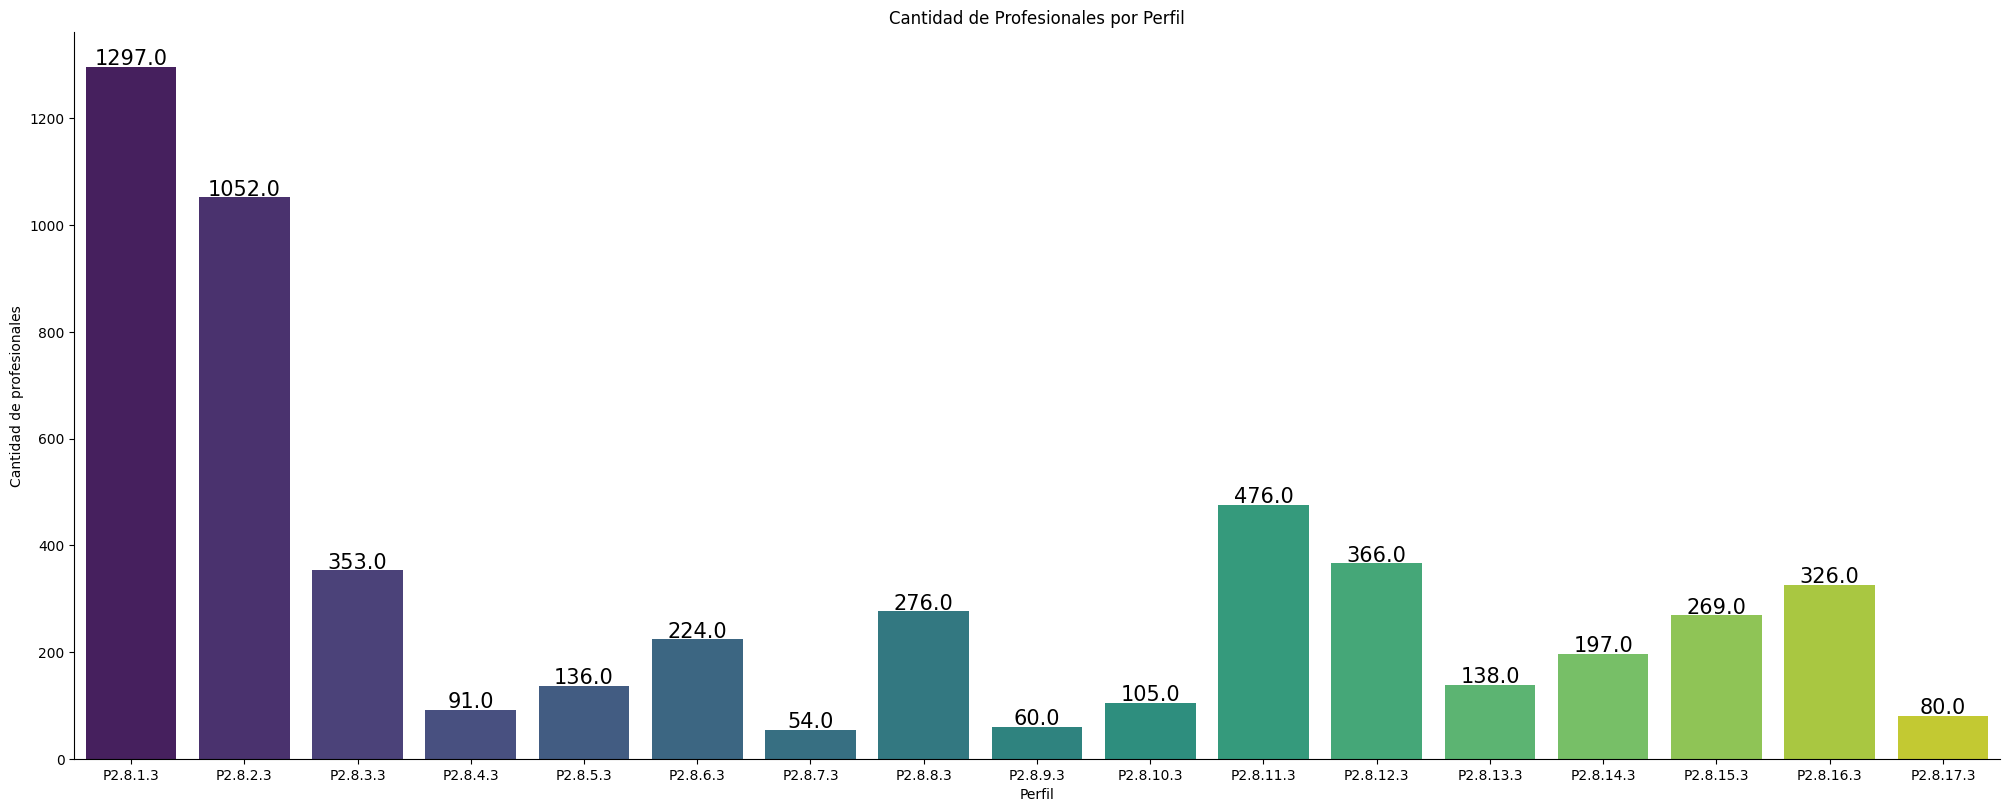

In [26]:
g = sns.catplot(data=ProfPorPerfil, kind="bar", height=8, aspect=2.5, palette='viridis',estimator="sum",errorbar=None)

plt.title('Cantidad de Profesionales por Perfil')
plt.xlabel('Perfil')
plt.ylabel('Cantidad de profesionales')

for ax in g.axes.flat:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width / 2, y + height + 15), ha='center', va='center',fontsize=15)

plt.show()

In [27]:
df_melted = pd.melt(ProfPorPerfil, id_vars=['Tipo'], var_name='Columna', value_name='Cantidad')

df_sum = df_melted.groupby(['Tipo', 'Columna'])['Cantidad'].sum().reset_index()

df_sum['Porcentaje'] = df_sum.groupby('Columna')['Cantidad'].transform(lambda x: x / x.sum() * 100)

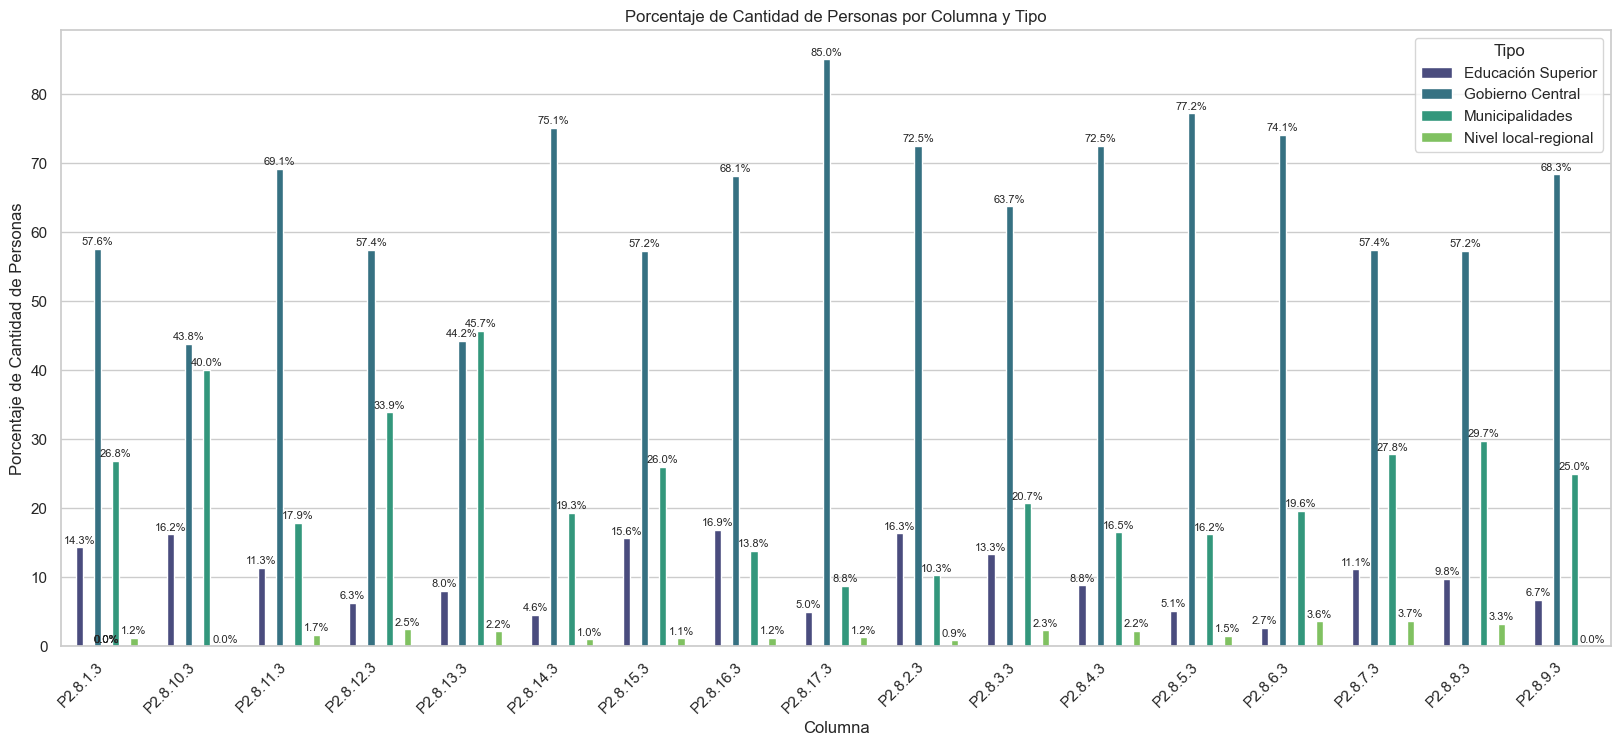

In [28]:

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='Columna', y='Porcentaje', hue='Tipo', data=df_sum, palette='viridis', dodge=True, gap=0.6,width=0.8)

plt.subplots_adjust(hspace=0.125, wspace=0.125)
plt.title('Porcentaje de Cantidad de Personas por Columna y Tipo')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Cantidad de Personas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo', loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height + 1), ha='center', va='center', fontsize=8)

plt.show()


## P4.3

In [32]:
FirmAutorizados = cuestionario[["Tipo","P4.3"]]
FirmAutorizados = FirmAutorizados.replace({'#s.i.': 0, '#n.a.': 0})
FirmAutorizados["P4.3"] = FirmAutorizados["P4.3"].astype(int)

In [33]:
bin = [0, 50, 200, 400, 700, 1200, 3000, 5000, 10000, 30000]
bins = pd.cut(FirmAutorizados['P4.3'], bins=bin, include_lowest=True)
FirmAutorizados['intervalos'] = bins

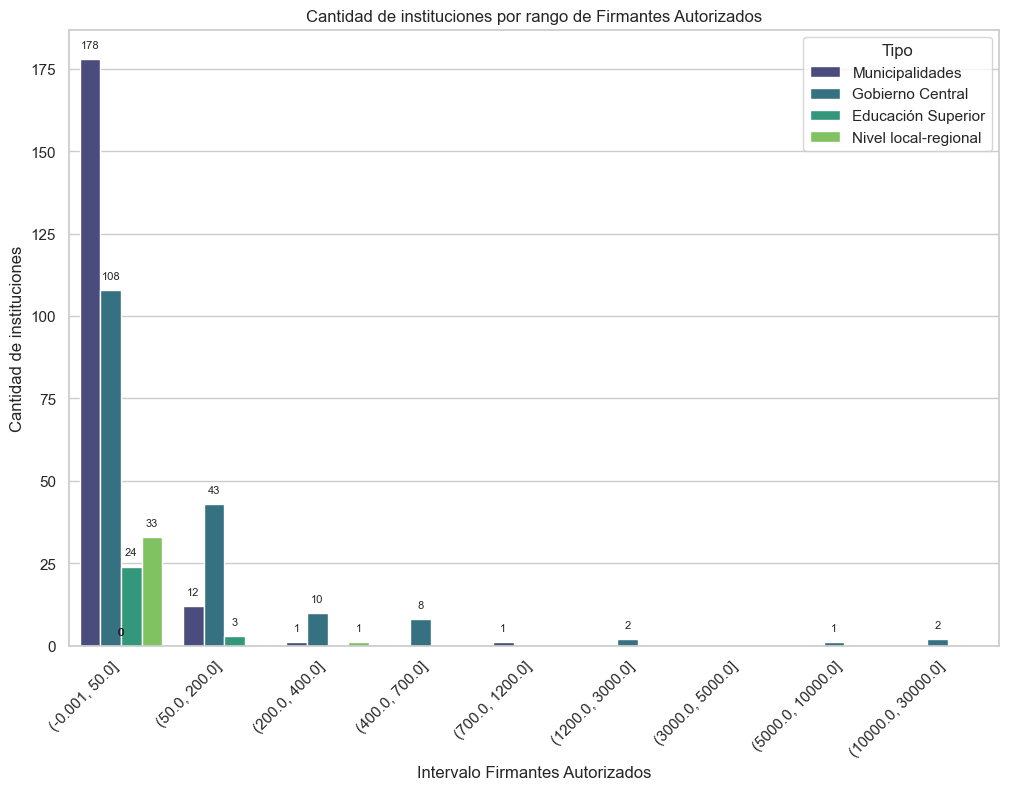

In [34]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=FirmAutorizados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Firmantes Autorizados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P4.4

In [35]:
DocsFirmados = cuestionario[["Tipo","P4.4"]]
DocsFirmados = DocsFirmados.replace({'#s.i.': 0, '#n.a.': 0})
DocsFirmados["P4.4"] = DocsFirmados["P4.4"].astype(int)
bin = [0, 500, 2000, 5000, 8000, 12000, 20000, 50000, 100000, 150000,300000,700000,1200000,2000000]
bins = pd.cut(DocsFirmados['P4.4'], bins=bin, include_lowest=True)
DocsFirmados['intervalos'] = bins


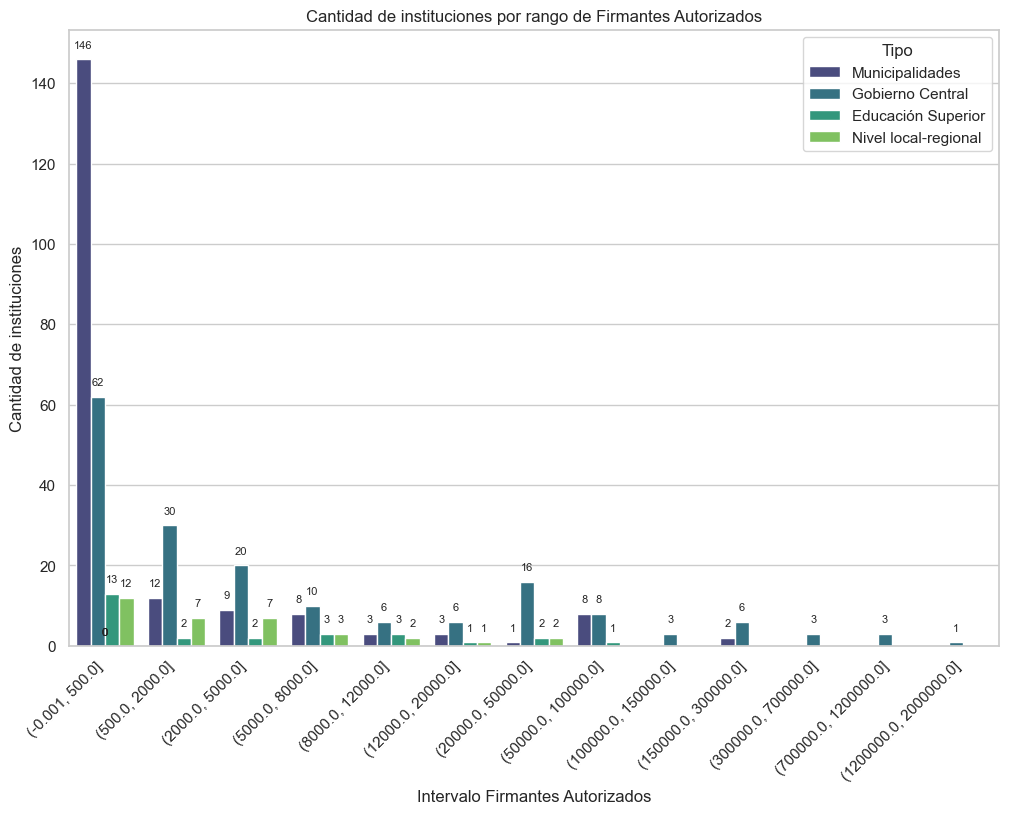

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocsFirmados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Firmantes Autorizados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P5.1

In [61]:
OficPartes = cuestionario[["Tipo","P5.1"]]
OficPartes = OficPartes.replace({'#s.i.': 0, '#n.a.': 0})
OficPartes["P5.1"] = OficPartes["P5.1"].astype(float)

In [62]:
OficPartes = OficPartes.loc[OficPartes['P5.1'] <= 1000]

In [63]:
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(OficPartes['P5.1'], bins=bin)
OficPartes['intervalos'] = bins

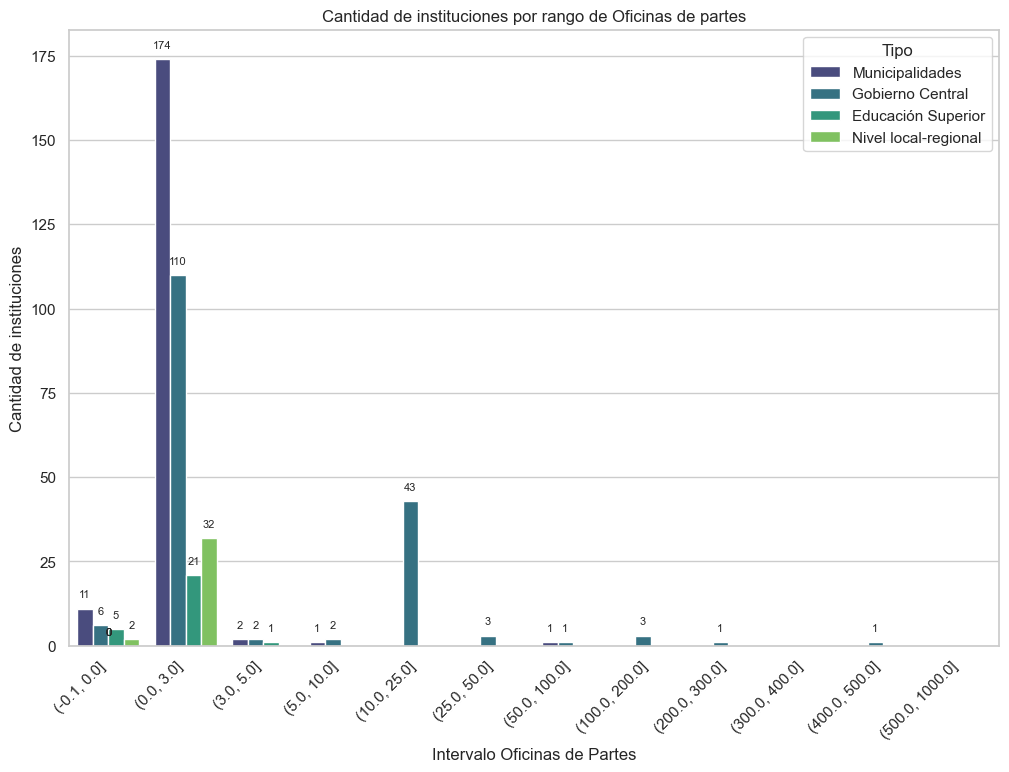

In [64]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=OficPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Oficinas de partes')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

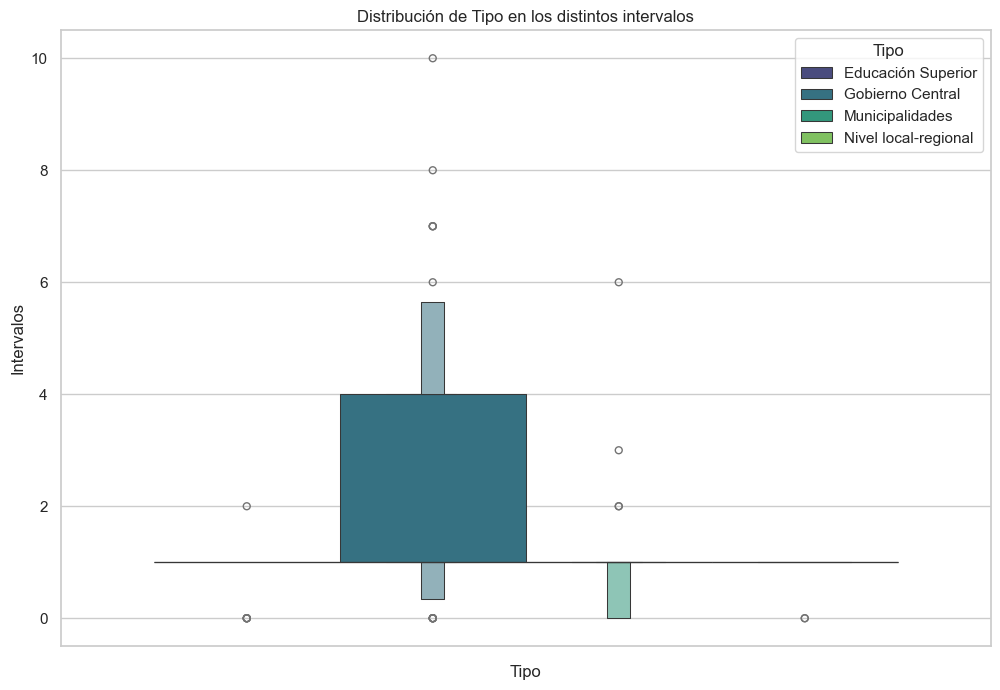

In [65]:
OficPartes['intervalos'] = OficPartes['intervalos'].cat.codes
OficPartes['Tipo'] = OficPartes['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(hue='Tipo', y='intervalos', data=OficPartes,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


## P5.2

In [68]:
PersOfiPartes = cuestionario[["Tipo","P5.2"]]
PersOfiPartes = PersOfiPartes.replace({'#s.i.': 0, '#n.a.': 0})
PersOfiPartes["P5.2"] = PersOfiPartes["P5.2"].astype(int)
PersOfiPartes = PersOfiPartes.loc[PersOfiPartes['P5.2'] <= 1000]
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(PersOfiPartes['P5.2'], bins=bin)
PersOfiPartes['intervalos'] = bins

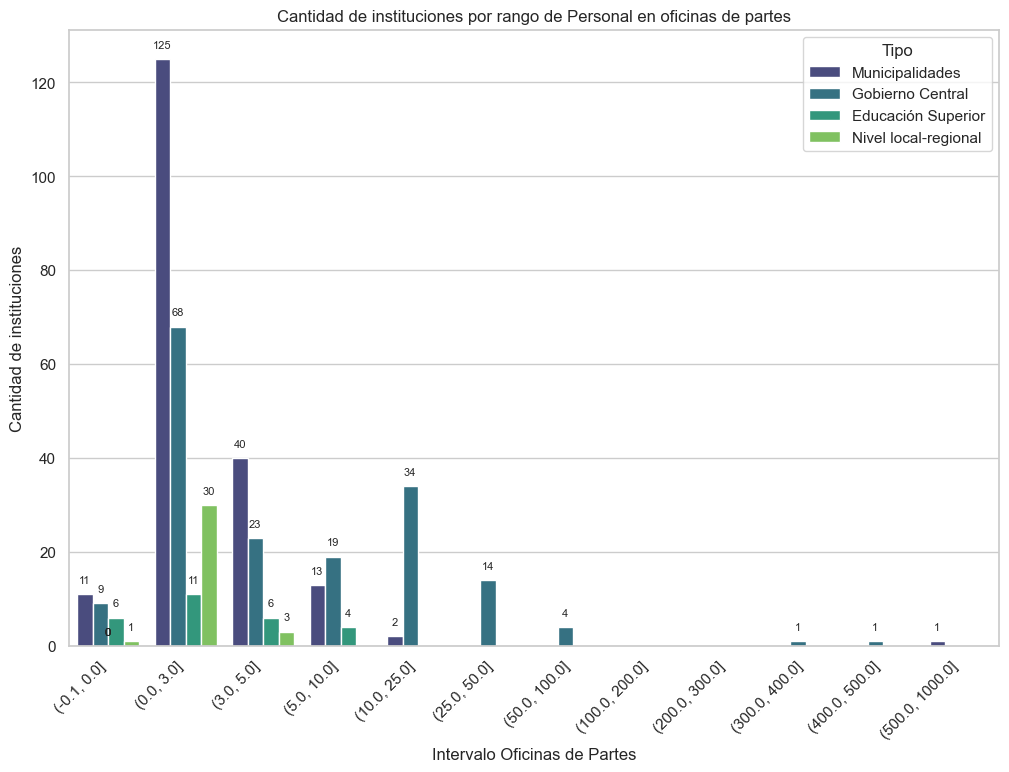

In [69]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PersOfiPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Personal en oficinas de partes')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [70]:
pivot_table = PersOfiPartes.pivot_table(index='Tipo', values=["P5.2"], aggfunc='sum')
df = pivot_table.sort_values(by='P5.2', ascending=False)['P5.2']

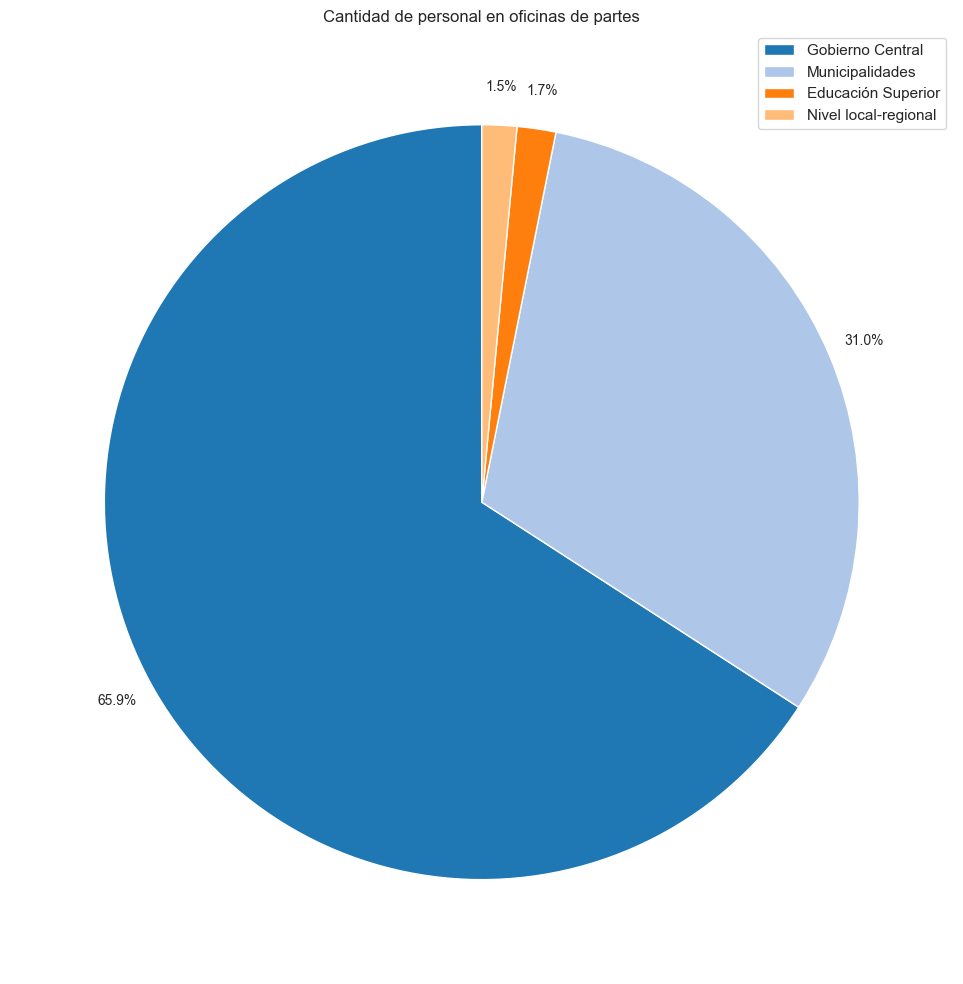

In [71]:
plt.figure(figsize=(10, 10))
plt.pie(df, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors,pctdistance=1.1,textprops={'fontsize': 10})
plt.legend(df.index, loc='upper right')
plt.title('Cantidad de personal en oficinas de partes')
plt.tight_layout()
plt.show()

## P5.3

In [73]:
DocOtrasInst = cuestionario[["Tipo","P5.3"]]
DocOtrasInst = DocOtrasInst.replace({'#s.i.': 0, '#n.a.': 0})
DocOtrasInst["P5.3"] = DocOtrasInst["P5.3"].astype(int)

In [77]:
bin = [-0.1,0,100, 500, 1000, 5000, 20000, 100000, 500000, 1000000, 2000000]
bins = pd.cut(DocOtrasInst['P5.3'], bins=bin)
DocOtrasInst['intervalos'] = bins

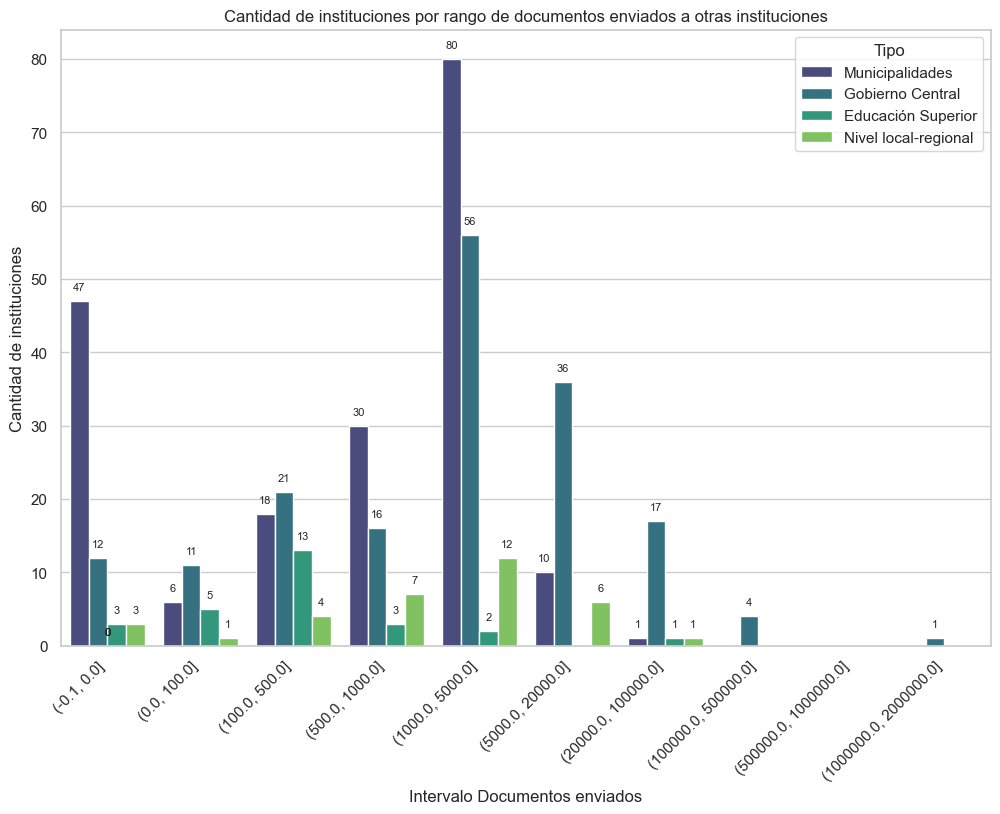

In [79]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocOtrasInst, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos enviados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de documentos enviados a otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P5.4

In [80]:
DocRecibidos = cuestionario[["Tipo","P5.4"]]
DocRecibidos = DocRecibidos.replace({'#s.i.': 0, '#n.a.': 0})
DocRecibidos["P5.4"] = DocRecibidos["P5.4"].astype(int)

In [81]:
bin = [-0.1,0,100, 500, 1000, 5000, 20000, 100000, 500000, 1000000]
bins = pd.cut(DocRecibidos['P5.4'], bins=bin)
DocRecibidos['intervalos'] = bins

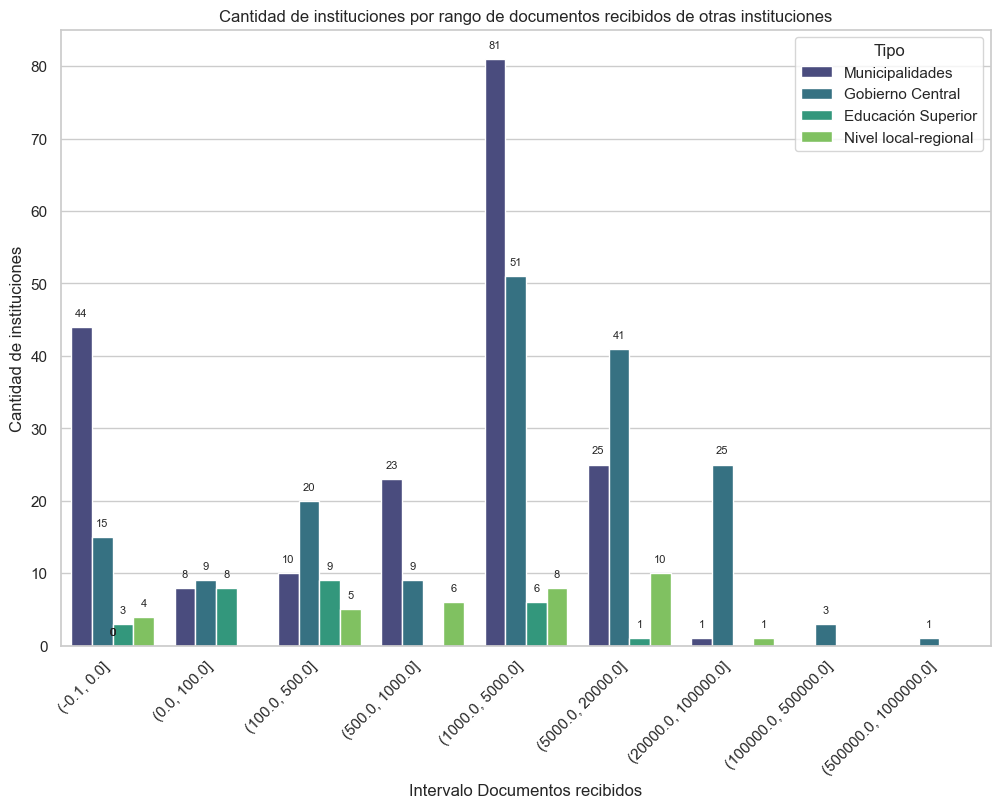

In [82]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocRecibidos, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos recibidos')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de documentos recibidos de otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P5.7

In [84]:
ActPolitDocumental = cuestionario[["Tipo","P5.7"]]
ActPolitDocumental = ActPolitDocumental.replace({'#s.i.': np.nan, '#n.a.': np.nan})
ActPolitDocumental = ActPolitDocumental.dropna()
ActPolitDocumental["P5.7"] = ActPolitDocumental["P5.7"].astype(int)

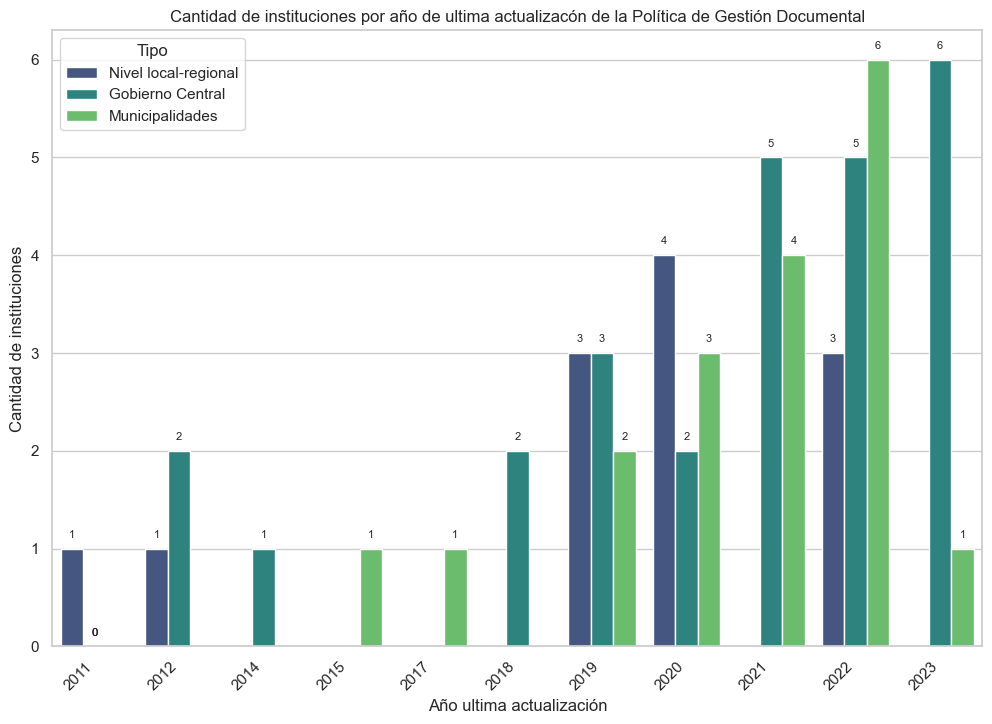

In [87]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='P5.7', hue='Tipo', data=ActPolitDocumental, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Año ultima actualización')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por año de ultima actualizacón de la Política de Gestión Documental')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P6.1

In [91]:
CartCertificadas = cuestionario[["Tipo","P6.1"]]
CartCertificadas = CartCertificadas.replace({'#s.i.': 0, '#n.a.': 0})
CartCertificadas["P6.1"] = CartCertificadas["P6.1"].astype(int)

In [92]:
bin = [0,200, 500, 1000, 5000, 20000, 100000, 500000, 1000000,2500000]
bins = pd.cut(CartCertificadas['P6.1'], bins=bin)
CartCertificadas['intervalos'] = bins

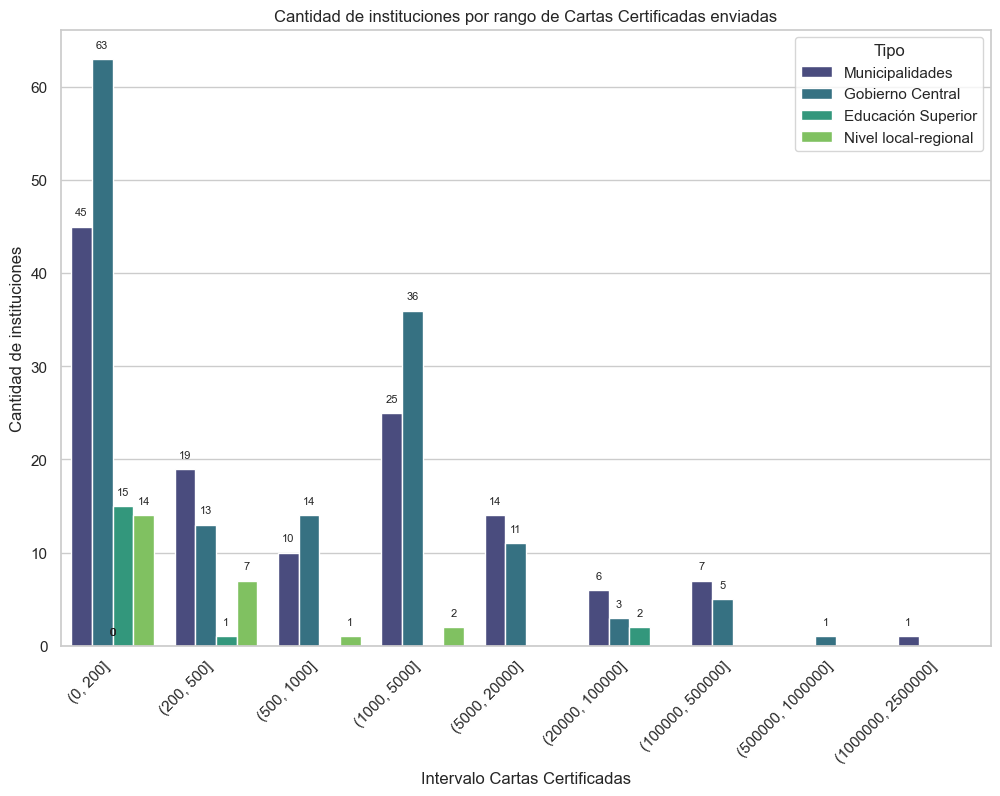

In [93]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CartCertificadas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Cartas Certificadas')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Cartas Certificadas enviadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

## P6.2

In [94]:
CostoCartCertificadas = cuestionario[["Tipo","P6.2"]]
CostoCartCertificadas = CostoCartCertificadas.replace({'#s.i.': 0, '#n.a.': 0})
CostoCartCertificadas["P6.2"] = CostoCartCertificadas["P6.2"].astype(int)

In [100]:
bin = [0, 5000, 15000, 40000, 100000, 200000, 400000, 700000, 1200000, 30000000, 50000000, 100000000, 200000000, 500000000, 16000000000]
bins = pd.cut(CostoCartCertificadas['P6.2'], bins=bin)
CostoCartCertificadas['intervalos'] = bins

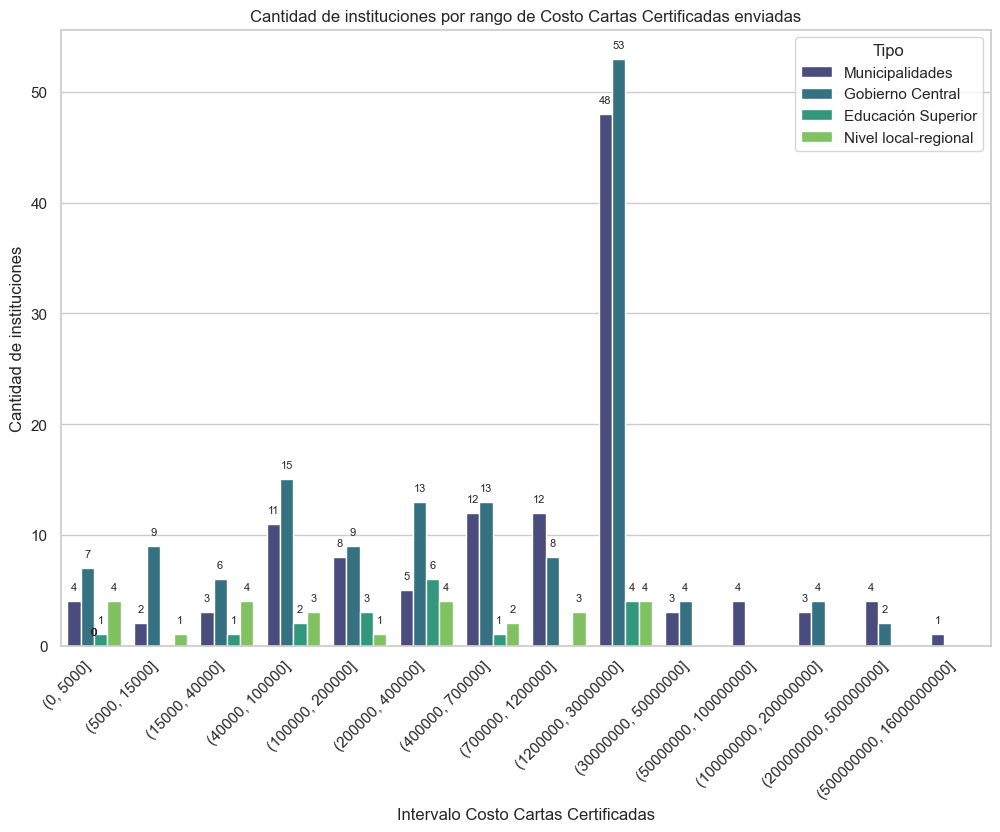

In [102]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CostoCartCertificadas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Costo Cartas Certificadas')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Costo Cartas Certificadas enviadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [139]:
CostoPorCarta = cuestionario[["Tipo","P6.1","P6.2"]]
CostoPorCarta = CostoPorCarta.replace({'#s.i.': 0, '#n.a.': 0})
CostoPorCarta["CostoPorCarta"] = CostoPorCarta["P6.2"] / CostoPorCarta["P6.1"]
CostoPorCarta = CostoPorCarta.replace([np.inf, -np.inf], np.nan)
CostoPorCarta = CostoPorCarta.dropna()

In [140]:
bin = [0, 1000, 5000, 20000, 50000, 100000, 200000]
bins = pd.cut(CostoPorCarta['CostoPorCarta'], bins=bin)
CostoPorCarta['intervalos'] = bins

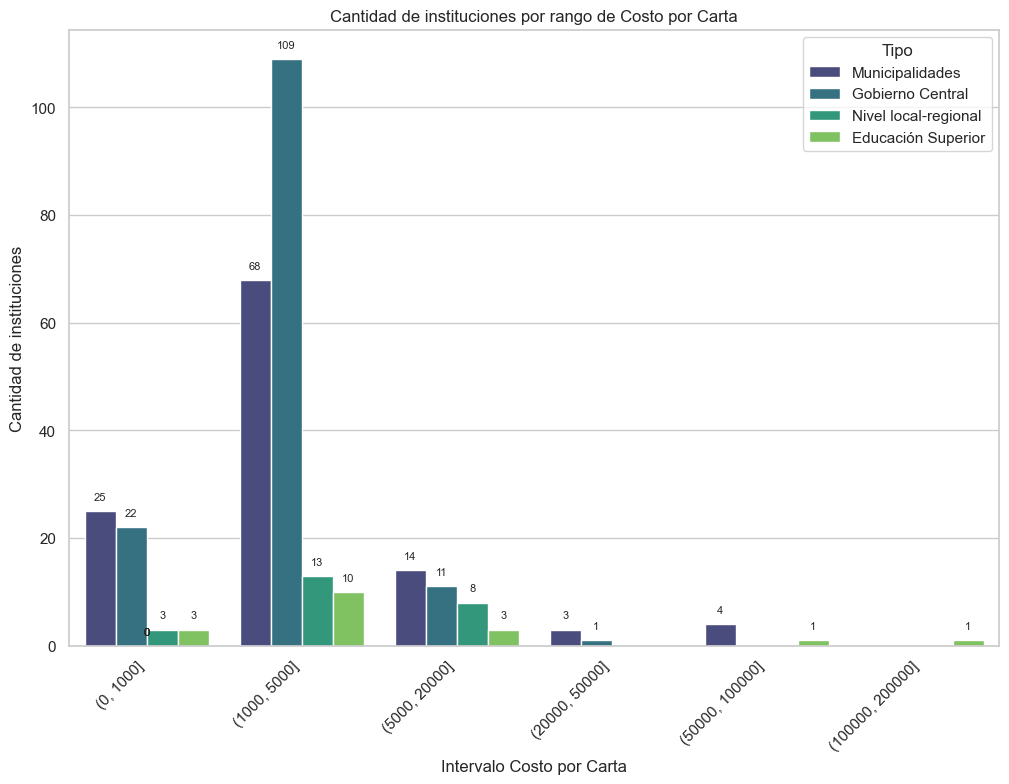

In [141]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CostoPorCarta, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Costo por Carta')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Costo por Carta')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_15684\1479016640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df = CostoPorCarta.groupby(['intervalos', 'Tipo']).size().unstack().fillna(0)


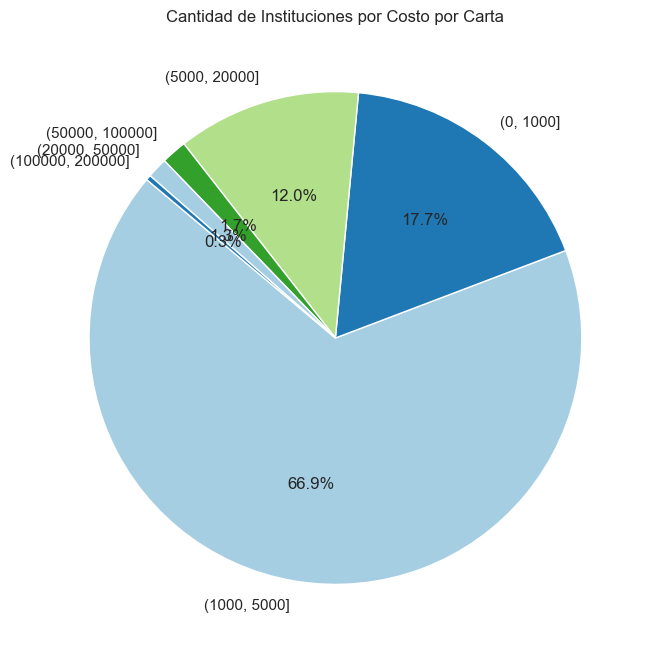

In [142]:
counts_df = CostoPorCarta.groupby(['intervalos', 'Tipo']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(CostoPorCarta['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Cantidad de Instituciones por Costo por Carta')

plt.show()

## P7.1

In [181]:
InterOtrasInstituciones = cuestionario[["Tipo","P7.1.1","P7.1.2","P7.1.3","P7.1.4","P7.1.5","P7.1.6"]]

In [182]:
SiInteractuan = InterOtrasInstituciones[["Tipo","P7.1.1"]]
SiInteractuan = SiInteractuan.replace({'#s.i.': 'No interactúan'})
SiInteractuan = SiInteractuan.dropna()
SiInteractuan['Interactuan'] = SiInteractuan['P7.1.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)

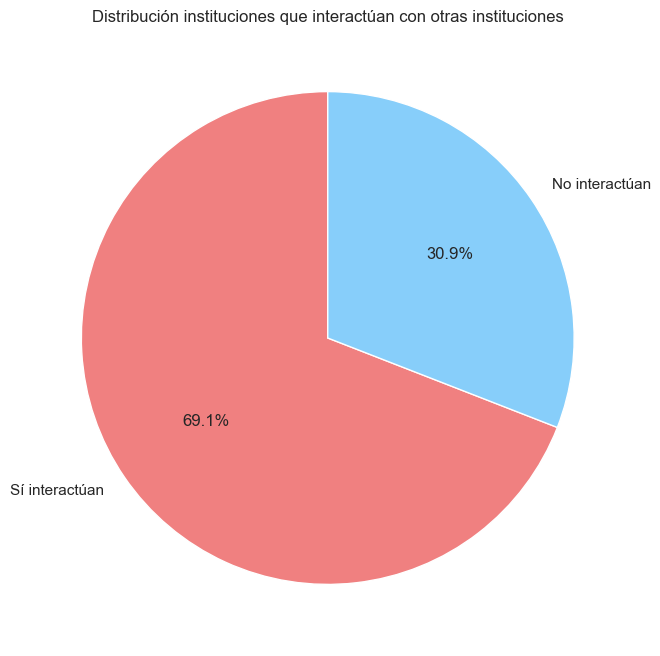

In [183]:
counts = SiInteractuan['Interactuan'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Distribución instituciones que interactúan con otras instituciones')

plt.show()

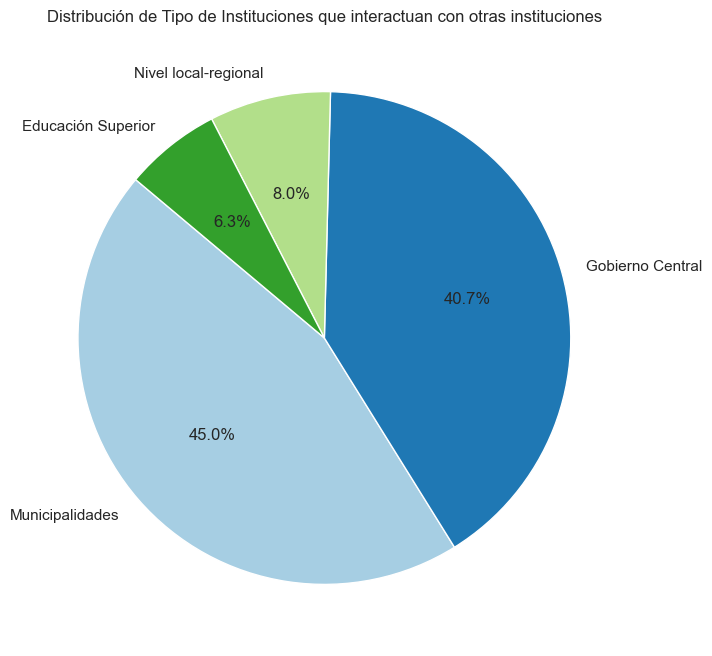

In [256]:
counts_df = SiInteractuan.groupby(['Tipo', 'P7.1.1']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(SiInteractuan['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribución de Tipo de Instituciones que interactuan con otras instituciones')

plt.show()

In [224]:
InterOtrasInstituciones = InterOtrasInstituciones.replace({'#s.i.':np.nan, '#n.a.':0})
InterOtrasInstituciones = InterOtrasInstituciones.dropna()

In [225]:
InterOtrasInstituciones['CantidadInteracciones'] = InterOtrasInstituciones.iloc[:, 2:].apply(lambda row: sum(row != 0), axis=1)
InterOtrasInstituciones['CantidadInteracciones'] = InterOtrasInstituciones['CantidadInteracciones'].replace(6,"Mas de 5")

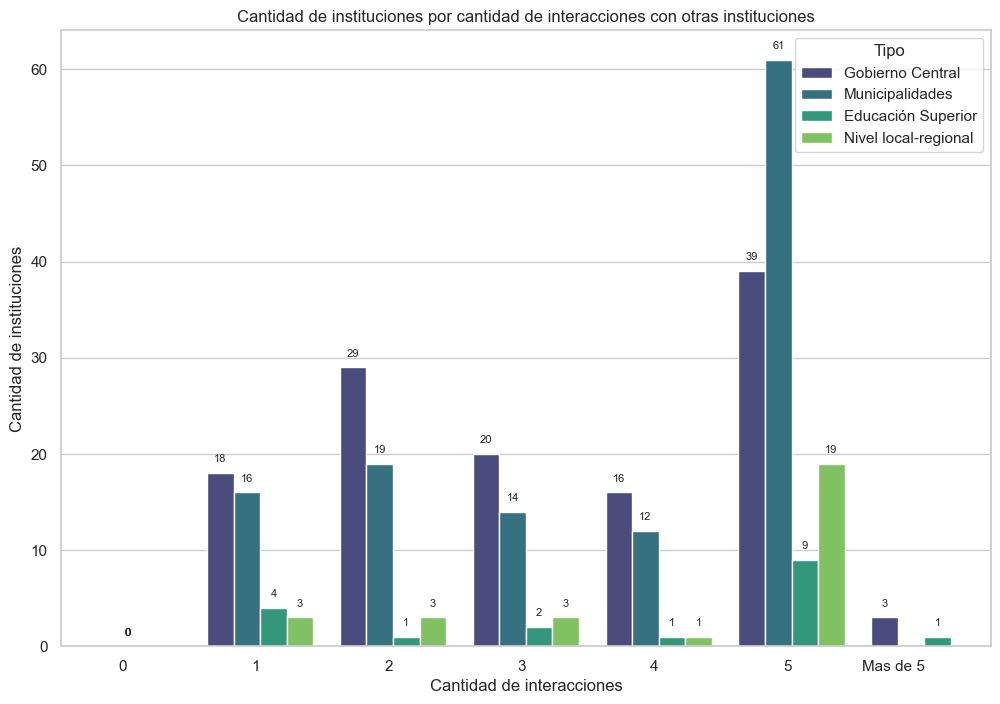

In [227]:
orden_arbitrario = [0,1,2,3,4,5,"Mas de 5"]
InterOtrasInstituciones['CantidadInteracciones'] = pd.Categorical(InterOtrasInstituciones['CantidadInteracciones'], categories=orden_arbitrario, ordered=True)
InterOtrasInstituciones = InterOtrasInstituciones.sort_values(by='CantidadInteracciones')

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='CantidadInteracciones', hue='Tipo', data=InterOtrasInstituciones, palette='viridis')

plt.xticks(rotation=0, ha='right')
plt.xlabel('Cantidad de interacciones')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por cantidad de interacciones con otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [284]:
columnas_interes = InterOtrasInstituciones.iloc[:, 1:7]  # Selecciona las columnas P7.1.1 a P7.1.6

In [285]:
conteo_total = columnas_interes.values.flatten()
conteo_total = pd.Series(conteo_total)
top_5_comunes = conteo_total.value_counts().head(6)
top_5_comunes = top_5_comunes.drop(0)
df_top_5_comunes = top_5_comunes.reset_index()
df_top_5_comunes.columns = ['Valor', 'Count']


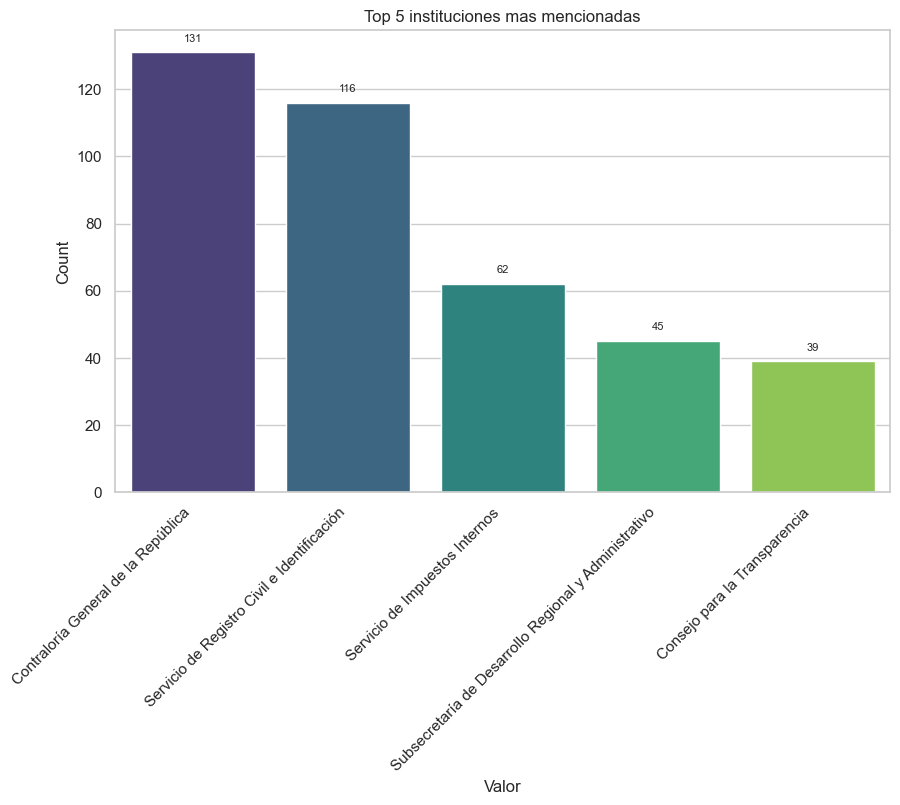

In [286]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Valor',x="Valor", y='Count', data=df_top_5_comunes, palette="viridis",legend=False)

plt.xlabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top 5 instituciones mas mencionadas')

for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

## P7.2

In [252]:
InterOtrasInstitucionesPriv = cuestionario[["Tipo","P7.2.1","P7.2.2","P7.2.3","P7.2.4","P7.2.5"]]

In [253]:
SiInteractuanPriv = InterOtrasInstitucionesPriv[["Tipo","P7.2.1"]]
SiInteractuanPriv = SiInteractuanPriv.replace({'#s.i.': 'No interactúan'})
SiInteractuanPriv = SiInteractuanPriv.dropna()
SiInteractuanPriv['Interactuan'] = SiInteractuanPriv['P7.2.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)

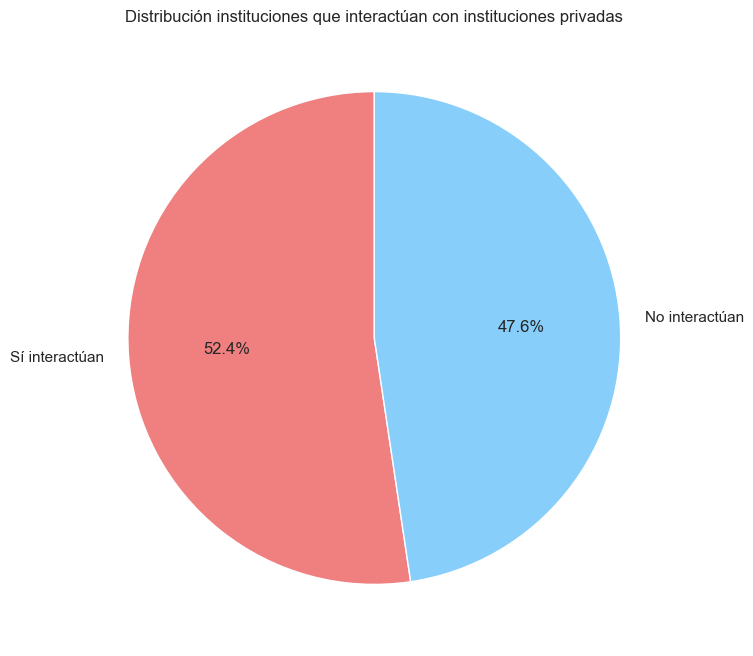

In [255]:
counts = SiInteractuanPriv['Interactuan'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Distribución instituciones que interactúan con instituciones privadas')

plt.show()

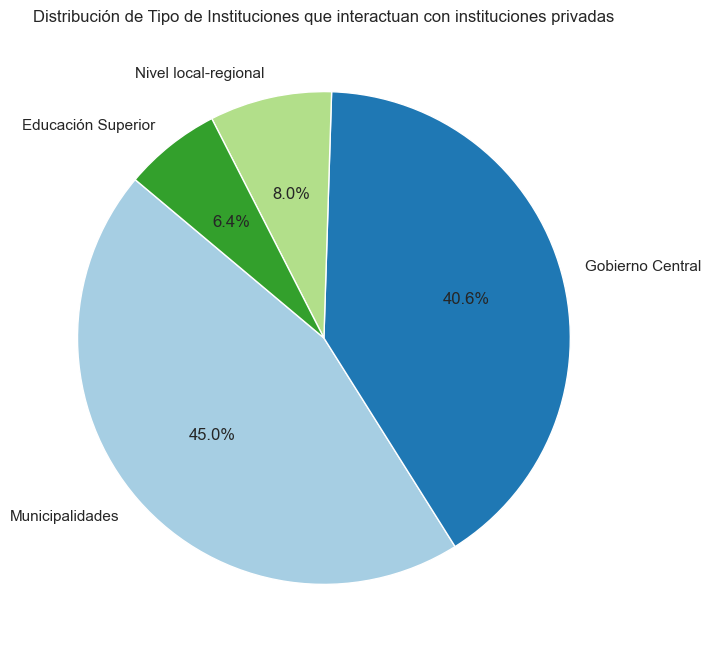

In [257]:
counts_df = SiInteractuanPriv.groupby(['Tipo', 'P7.2.1']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(SiInteractuanPriv['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribución de Tipo de Instituciones que interactuan con instituciones privadas')

plt.show()

In [258]:
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.replace({'#s.i.':np.nan, '#n.a.':0})
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.dropna()

In [269]:
InterOtrasInstitucionesPriv['CantidadInteracciones'] = InterOtrasInstitucionesPriv.iloc[:, 2:].apply(lambda row: sum(row != 0), axis=1)

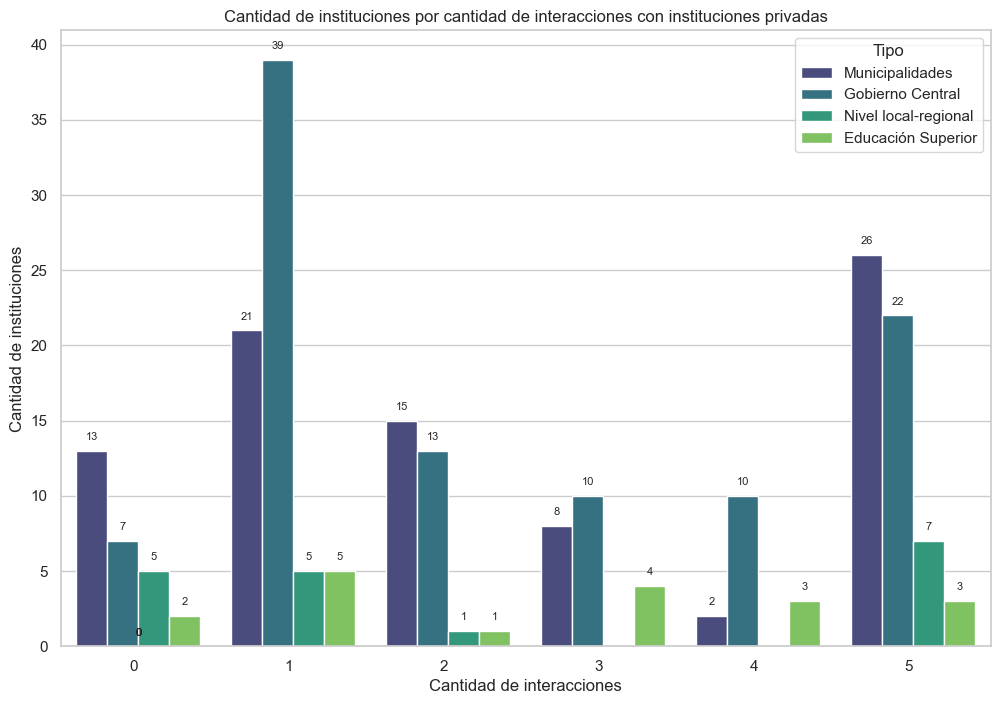

In [271]:
orden_arbitrario = [0,1,2,3,4,5]
InterOtrasInstitucionesPriv['CantidadInteracciones'] = pd.Categorical(InterOtrasInstitucionesPriv['CantidadInteracciones'], categories=orden_arbitrario, ordered=True)
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.sort_values(by='CantidadInteracciones')

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='CantidadInteracciones', hue='Tipo', data=InterOtrasInstitucionesPriv, palette='viridis')

plt.xticks(rotation=0, ha='right')
plt.xlabel('Cantidad de interacciones')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por cantidad de interacciones con instituciones privadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [291]:
columnas_interes_priv = InterOtrasInstitucionesPriv.iloc[:, 1:6] 

In [292]:
conteo_total_priv = columnas_interes_priv.values.flatten()
conteo_total_priv = pd.Series(conteo_total_priv)
top_5_comunes_priv = conteo_total_priv.value_counts().head(6)
top_5_comunes_priv = top_5_comunes_priv.drop(0)
top_5_comunes_priv = top_5_comunes_priv.reset_index()
top_5_comunes_priv.columns = ['Valor', 'Count']


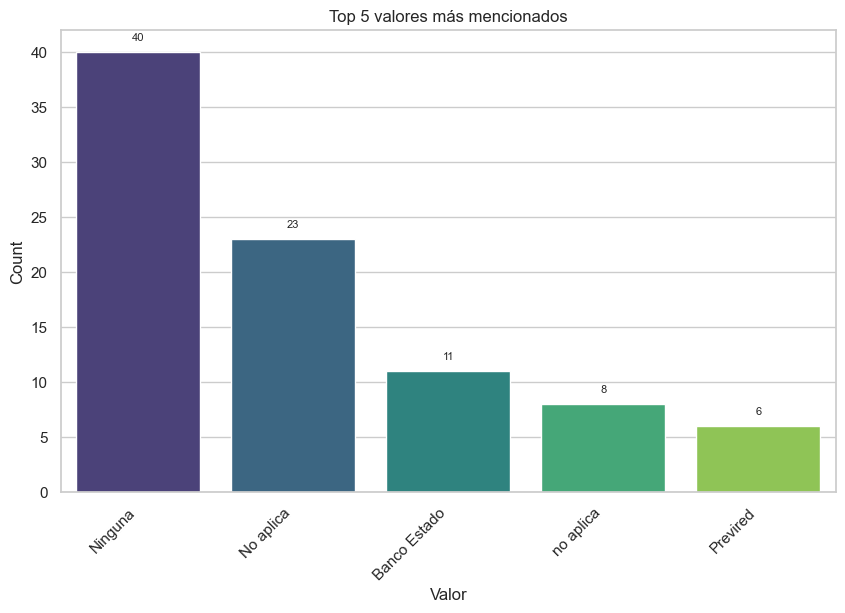

In [293]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Valor',x="Valor", y='Count', data=top_5_comunes_priv, palette="viridis",legend=False)

plt.xlabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top 5 valores más mencionados')

for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

In [237]:
top_5_comunes

Contraloría General de la República                      131
Servicio de Registro Civil e Identificación              116
Servicio de Impuestos Internos                            62
Subsecretaría de Desarrollo Regional y Administrativo     45
Consejo para la Transparencia                             39
Name: count, dtype: int64